# Andrew Ng Coursera Machine Learning Course - Ex 2
**Dean's Reimplementation Attempt**

*8/19/2017*

Note: See [here](https://docs.scipy.org/doc/scipy/reference/api.html#guidelines-for-importing-functions-from-scipy) for recommendations on how to import `scipy` modules.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

## 1. Logistic Regression
**Note:** This is a classification algorithm, despite the term "regression" in the name.  Classification means outputs $y$ take on discrete values, for example $y \in \{0,1\}$.  The output is  also known as a *label*.

*Sigmoid function*, aka *logistic function*

$$ g(z) = \frac{1}{1 + e^{-z}}$$

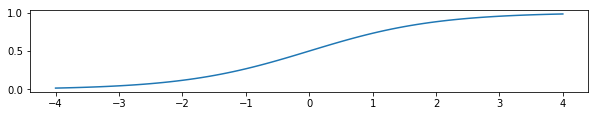

In [4]:
z = np.arange(-4, 4.01, .1)
g = 1 / (1 + np.exp(-z))
plt.figure(figsize=(10, 1.5))
plt.plot(z, g)

For the hypothesis, use:

$$z = \theta^Tx$$

$$h_\theta(x) = g(z) = g(\theta^Tx) = \frac{1}{1 + e^{-\theta^Tx}} $$

... making $h_\theta(x)$ the probability that the output is 1, not 0.

$$h_\theta(x) = P(y=1 \: | \: x;\theta) $$

For the decision boundary, if $h_\theta(x) \ge 0.5$, predict $y = 1$.  This happens when $z \ge 0$.

For the cost function, use:

$$\text{Cost}(h_\theta(x), y) = - \log_e(h_\theta(x)) \qquad\qquad \text{if} \, y=1 $$
$$\text{Cost}(h_\theta(x), y) = - \log_e(1 - h_\theta(x)) \qquad \text{if} \, y=0 $$
$$J(\theta) = \frac{1}{m} \sum_{i=1}^m \text{Cost}\left(h_\theta(x^{(i)}, y^{(i)}\right) $$

...so...

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ 
y^{(i)} \log(h_\theta(x^{(i)}))
+ (1-y^{(i)}) \log(1 - h_\theta(x^{(i)}))
\right] $$

Vectorized, this is:
$$J(\theta) = \frac{1}{m} \left( -y^\top\log(h) - (1-y)^\top\log(1-h) \right) $$

The gradient is:
$$\frac{\partial}{\partial\theta_j} = \frac{1}{m} \sum_{i=1}^m
  \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$

So the gradient descent rule is:

$$\theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m
  \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$
...which *looks* the same as for linear regression, but remember that $h_\theta(x^{(i)})$ is the sigmoid function this time.

## 1.1 Visualizing the data

See [numpy.matmul() documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) for how a 1-D numpy array is treated by matrix multiplication.  

Basically, given vector v and matrix M, in **`v@M`** the v is treated as a row vector, but in **`M@v`** the v is treated as a column vector.

In [37]:
data = np.loadtxt('ex2/ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]    # y = data[:, 2:3] for 1-column 2-d array.
print(data.shape)
print(X.shape)
print(y.shape)
print(data[:5])
print(X[:5])
print(y[:5])

(100, 3)
(100, 2)
(100,)
[[ 34.62365962  78.02469282   0.        ]
 [ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]]
[[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 [ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]]
[ 0.  0.  0.  1.  1.]


In [38]:
pos = np.where(y == 1)
neg = np.where(y == 0)

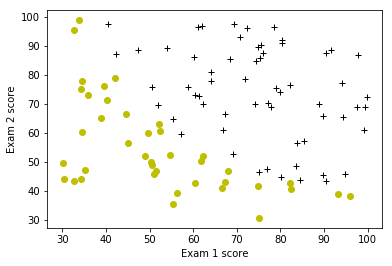

In [39]:
plt.plot(X[pos, 0], X[pos, 1], 'k+', label='Admitted')
plt.plot(X[neg, 0], X[neg, 1], 'yo', label='Not admitted')
#plt.legend() # This was putting one legend entry for each point.
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# 1.2. Implementation

In [40]:
# Add the intercept/bias term of all 1's to X.
m = X.shape[0]
ones = np.ones((m, 1))
X = np.hstack((ones, X))
print(X[:5])

[[  1.          34.62365962  78.02469282]
 [  1.          30.28671077  43.89499752]
 [  1.          35.84740877  72.90219803]
 [  1.          60.18259939  86.3085521 ]
 [  1.          79.03273605  75.34437644]]


## 1.2.1. Warmup exercise: sigmoid function
*Sigmoid function*, aka *logistic function*

$$ g(z) = \frac{1}{1 + e^{-z}}$$

In [41]:
# Student implements...
def sigmoid(X):
    g = 1 / (1 + np.exp(-X))
    return g

## 1.2.2. Cost function and gradient

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ 
y^{(i)} \log(h_\theta(x^{(i)}))
+ (1-y^{(i)}) \log(1 - h_\theta(x^{(i)}))
\right] $$

$$\frac{\partial}{\partial\theta_j} = \frac{1}{m} \sum_{i=1}^m
  \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$

In [42]:
initial_theta = np.zeros(X.shape[1]) # np.zeros((X.shape[1], 1)), for n x 1 2d array
initial_theta

array([ 0.,  0.,  0.])

In [43]:
# Student implements...
def costFunction(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X @ theta) # Not theta.T @ X because I wanted samples in rows?

    Jsumofones = y.T @ np.log(h) 
    Jsumofzeros = (1-y).T @ np.log(1-h)
    J = (-1/m) * (Jsumofones + Jsumofzeros)
    
    grad = (1/m) * X.T @ (h - y)

    return J, grad

In [44]:
cost, grad = costFunction(initial_theta, X, y)

In [45]:
# Expected 0.693, and [-0.1, -12.0092, -11.2628]
print(cost) # Should this be coming out as a scalar, not a 2-d array?
print(grad) # Should this be coming out as a 1-d array, not a 2-d array?

0.69314718056
[ -0.1        -12.00921659 -11.26284221]


In [48]:
# Extra parentheses and commas would make the following a column vector.
#test_theta = np.array(((-24,), (0.2,), (0.2,)))
test_theta = np.array((-24, 0.2, 0.2))
print(test_theta.shape)
cost, grad = costFunction(test_theta, X, y)

(3,)


In [49]:
# Expected cost (approx): 0.218
# Expected gradients (approx):  0.043, 2.566, 2.647');
print(cost) # Should this be coming out as a scalar, not a 2-d array?
print(grad) # Should this be coming out as a 1-d array, not a 2-d array?

0.218330193827
[ 0.04290299  2.56623412  2.64679737]


### 1.2.3. Learning parameters using `scipy.optimize.minimize`
`scipy.optimize.minimize()` calls back the objective function with only the parameter vector being optimized (in our case, `theta`).  So first we make basically a partial function based on our `costFunction()` that will still accept `theta`, but will fill in `X` and `y` for us.

Note: This has to do with partial as a functional programming concept, not partial derivatives.

Note2: It would have been nice to do this with the `partial()` function in the `functools` module, but I don't think the original order of parameters allows that, so do it manually, depending on `X` and `y` being in the overall scope (yuk).

Note3: Wait, they had to do the same thing with the `@(t) (costFunction(t, X, y))` syntax in octave/Matlab.  Maybe I should just use a python lambda like `optimize.minimize(lambda t: costFunction(t, X, y), ...

In [55]:
def costFun(theta):
    J, grad = costFunction(theta, X, y)
    return J, grad
    # return J[0], grad[:,0]

In [56]:
# Extra parentheses and commas would make the following a column vector.
#test_theta = np.array(((-24,), (0.2,), (0.2,)))
test_theta = np.array((-24, 0.2, 0.2))
print(test_theta.shape)
cost, grad = costFun(test_theta)
test_theta

(3,)


array([-24. ,   0.2,   0.2])

In [57]:
# Expected cost (approx): 0.218
# Expected gradients (approx):  0.043, 2.566, 2.647');
print(cost) # Should this be coming out as a scalar, not a 2-d array?
print(grad) # Should this be coming out as a 1-d array, not a 2-d array?

0.218330193827
[ 0.04290299  2.56623412  2.64679737]


**OK, NOW try minimizing**

Note:  Was using `fminunc()` in Matlab

In [58]:
initial_theta = np.zeros([X.shape[1]])
initial_theta = test_theta

In [136]:
%%time
result = optimize.minimize(
    costFun, #lambda t: costFunction(t, X, y), 
    initial_theta, 
    jac=True, 
    options={'maxiter':100, 'disp':True}
    )

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
Wall time: 12 ms


In [137]:
result

      fun: 0.2034977015894421
 hess_inv: array([[  3.33350099e+03,  -2.66055767e+01,  -2.69764676e+01],
       [ -2.66055767e+01,   2.27032698e-01,   2.02191103e-01],
       [ -2.69764676e+01,   2.02191103e-01,   2.33923485e-01]])
      jac: array([ -1.29877864e-08,  -9.15436295e-07,  -7.66847116e-07])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 16
     njev: 22
   status: 0
  success: True
        x: array([-25.16133175,   0.2062317 ,   0.20147159])

In [138]:
# Print theta to screen
print('Cost at theta found by optimize: %s' % result.fun)
print('Expected cost (approx):          0.203')
print('theta:                           %s' % result.x)
print('Expected theta (approx):         -25.161, 0.206, 0.201')

Cost at theta found by optimize: 0.2034977015894421
Expected cost (approx):          0.203
theta:                           [-25.16133175   0.2062317    0.20147159]
Expected theta (approx):         -25.161, 0.206, 0.201


### 1.2.4. Evaluating Logistic Regression
Try predicting one student.

** Something possibly wrong here **

In [139]:
theta = result.x
X_one = np.array((1, 45, 85))
h_one = sigmoid(X_one @ theta)
h_one

0.77629064887795896

In [140]:
# Hmmm.
print('For scores 45 and 85, we predict admission probability %f' % h_one)
print('Expected value: 0.775 +/- 0.002')

For scores 45 and 85, we predict admission probability 0.776291
Expected value: 0.775 +/- 0.002


** Something definately wrong here **

In [146]:
### Dohp!
probabilities = sigmoid(X @ theta)
#predictions = np.where(probabilities >= 0.5, 1.0, 0.0)
#predictions = np.round(probabilities) + np.around() # goes to nearest even value, so not exactly the same.
predictions = (probabilities >= 0.5).astype(np.float)
accuracy = predictions.mean()
accuracy

0.60999999999999999

In [135]:
print('Expected accuracy (approx): 89.0')

Train Accuracy: [61.0]:
Expected accuracy (approx): 89.0
